In [1]:
import random
import pandas as pd
import numpy as np
from scipy.stats import bernoulli
from itertools import combinations
from pprint import pprint
from tqdm.auto import trange
from time import sleep


In [2]:
from Dissertation import RandomGenerator, convert_to_int, get_order_index

In [3]:
rg = RandomGenerator(10, 10_000_000, use_dask = True)

dataset is ordered by cov


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
rg("sample")
del rg

http://127.0.0.1:8787/status


In [1]:
import dask.dataframe as dd
ddf = dd.read_parquet('sample')

In [2]:
ddf

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,y
npartitions=1000,,,,,,,,,,,,,
,int8,int8,int8,int8,int8,int8,int8,int8,int8,int8,int8,int8,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...


In [13]:
ddf.shape[0].compute()

10000000

In [7]:
rg.config

{'bernoulli parameters': {'X_0': 0.27575428587619877,
                          'X_1': 0.3794867755728134,
                          'X_2': 0.5314788106253254,
                          'X_3': 0.6655567525129151,
                          'X_4': 0.6104274579107789,
                          'X_5': 0.2475252208093142,
                          'X_6': 0.22409293918171783,
                          'X_7': 0.668501925161392,
                          'X_8': 0.7387211405108403,
                          'X_9': 0.7890023335932295},
 'coefficients': {'X_0': -1.924700761491512,
                  'X_0X_1X_2X_3X_4X_5X_6X_8X_9': -0.9758517352882885,
                  'X_0X_1X_2X_3X_4X_5X_6X_9': 2.773976042799955,
                  'X_0X_1X_2X_3X_4X_5X_7X_8': -6.407344897506113,
                  'X_0X_1X_2X_3X_4X_5X_8': -3.284952293976026,
                  'X_0X_1X_2X_3X_4X_6X_7': 2.325375496095824,
                  'X_0X_1X_2X_3X_4X_6X_9': 0.9872248996284831,
                  'X_0X_1X_2X_3X_4

In [4]:
import dask.dataframe as dd
df = rg._X
ddf = dd.from_pandas(df.astype(np.byte), chunksize = 1000)

In [5]:
sample_interaction = rg._config['interactions']
interactions = []

In [6]:
for key in sample_interaction.keys():
    interactions += sample_interaction[key]

In [5]:
rg.genCoefficients()
coef = rg._config['coefficients']

In [7]:
coef

{'X_0': 1.9794062042908498,
 'X_1': 1.3750738150276356,
 'X_2': 1.814632291759762,
 'X_3': 1.1494116295045202,
 'X_4': -2.560016518793906,
 'X_5': -1.2461155915321243,
 'X_6': 2.6954472588556633,
 'X_7': -4.411619231873416,
 'X_8': 2.867281659118025,
 'X_9': 0.006719914211955391,
 'X_4X_6': -2.851625200934226,
 'X_7X_9': -4.797107963235296,
 'X_0X_4': -0.0940378095508394,
 'X_4X_9': -0.9160614072173576,
 'X_0X_2': 3.432347750939096,
 'X_4X_8': 1.717324370038875,
 'X_1X_6': 5.06771759747165,
 'X_1X_4': -0.43969596369926833,
 'X_5X_7': -1.1761731408881888,
 'X_3X_6': 2.6322314621457443,
 'X_3X_7': -1.7724697377927063,
 'X_4X_5': 1.7870696633995564,
 'X_3X_8': -0.3739786606899136,
 'X_0X_6': 0.034183703918950314,
 'X_3X_4X_6': -5.897616353497293,
 'X_1X_5X_6': 2.8480580461574077,
 'X_0X_5X_9': -0.28853890228431833,
 'X_2X_3X_6': 3.733086018459696,
 'X_1X_2X_5': 3.7296609213009724,
 'X_0X_1X_3': 1.660186248323174,
 'X_2X_4X_9': -0.7996630450088011,
 'X_1X_4X_7': -3.011784754947146,
 'X_0X_

In [11]:
from numba import jit

In [12]:
@jit
def product(a:int, b:float)->float:
    return a*b

In [24]:
def random_func(series, interactions, coefficients):
    y = 0
    for idx in series.index:
        y += product(series[idx], coefficients[idx])
#         y += series[idx]*coefficients[idx]
    for arg in interactions:
        colname = ''.join(arg)
        y += product(series[arg].prod(), coefficients[colname])
#         y += series[arg].prod()*coefficients[colname]
    return y

In [41]:
def random_func2(series, interactions, coefficients):
    y = 0
    for idx in series.index:
        y += series[idx]*coefficients[idx]
    for arg in interactions:
        colname = ''.join(arg)
        y += series[arg].prod()*coefficients[colname]
    return y

In [45]:
from functools import partial
prod_interaction = partial(random_func, interactions = interactions, coefficients = coef)

In [46]:
line = df.iloc[0,:]

In [55]:
r1 = line.index[line.eq(1)].tolist()

In [56]:
from itertools import combinations

In [64]:
c= combinations(r1, 2)

In [65]:
[''.join(x) for x in list(c)]

['X_4X_6', 'X_4X_7', 'X_4X_8', 'X_6X_7', 'X_6X_8', 'X_7X_8']

In [72]:
def random_func3(series, coefficients):
    index_1 = series.index[series.eq(1)].tolist()
    y = 0
    for i in range(1, len(index_1)+1):
        if i == 1:
            for idx in index_1:
                y += coefficients[idx]
        else:
            interactions = [''.join(x) for x in list(combinations(index_1, i))]
            for term in interactions:
                try:
                    y += coefficients[term]
                except:
                    pass
    return y

In [77]:
prod_interaction = partial(random_func3, coefficients = coef)

In [78]:
sample = df.iloc[:1000,:]

In [79]:
import time

start = time.time()

sample.apply(prod_interaction, axis = 1)

end = time.time()

end-start

0.06604194641113281

In [80]:
result = ddf.apply(prod_interaction, axis = 1, meta = (None, 'float64'))

In [81]:
result.dask

HighLevelGraph with 2 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7fa375b1f880>
 0. from_pandas-c5aa69ab9648892a8d583bc17d8682b2
 1. apply-70d7fb582b27bf4253ad7ddbc343733a

In [83]:
import os
from dask.distributed import Client
client = Client(n_workers = os.cpu_count(), threads_per_worker = 2)

In [84]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 10
Total threads: 20,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:63723,Workers: 10
Dashboard: http://127.0.0.1:8787/status,Total threads: 20
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:63769,Total threads: 2
Dashboard: http://127.0.0.1:63770/status,Memory: 1.60 GiB
Nanny: tcp://127.0.0.1:63728,


In [85]:
resp = result.compute()

In [87]:
df['y'] = resp

In [95]:
order = get_order_index(df.iloc[:, :10], by = 'cov')

In [99]:
df.iloc[:,:10] = df.loc[:,df.columns[order]]

In [109]:
iter()

TypeError: 'int' object is not iterable

In [101]:
type(ddf)

dask.dataframe.core.DataFrame

In [104]:
isinstance(ddf, dd.core.DataFrame)

True

In [100]:
df

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,y
0,0,0,1,0,0,0,1,0,1,1,-12.413247
1,0,1,1,1,1,0,0,1,1,1,-8.556047
2,0,0,1,1,0,1,0,1,1,0,-11.098817
3,0,1,1,0,0,1,0,0,1,0,3.311491
4,1,0,1,1,1,0,0,0,0,1,5.914817
...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0,0,1,0,1,1,0,1,0,-5.077985
999996,0,0,1,1,0,1,1,0,1,0,-13.191629
999997,1,0,1,0,0,0,0,1,1,1,-7.041051
999998,1,0,1,1,1,1,0,1,0,0,8.545009


In [88]:
df

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,y
0,0,0,0,0,1,0,1,1,1,0,-12.413247
1,1,0,1,0,0,1,1,1,1,1,-8.556047
2,1,0,0,1,0,1,1,0,1,0,-11.098817
3,0,0,0,1,0,0,1,0,1,1,3.311491
4,1,1,1,0,0,0,0,1,1,0,5.914817
...,...,...,...,...,...,...,...,...,...,...,...
999995,1,0,0,1,1,0,1,0,0,0,-5.077985
999996,1,0,0,1,1,0,1,0,1,0,-13.191629
999997,0,1,0,0,0,1,1,1,1,0,-7.041051
999998,1,1,1,1,0,1,0,0,1,0,8.545009


In [8]:
result.dask

HighLevelGraph with 2 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7fa650b234f0>
 0. from_pandas-860dcb82d301b622140ad49ba0b44b92
 1. apply-e8b8630c4185e023006a28b2ad818ce5

In [9]:
from dask.distributed import Client
client = Client()
client

2022-11-12 23:52:36,747 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-1m9go9qn', purging
2022-11-12 23:52:36,748 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-c0ur1z2j', purging
2022-11-12 23:52:36,748 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-9o0x4nu_', purging
2022-11-12 23:52:36,748 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-7_j67jwn', purging
2022-11-12 23:52:36,748 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-rofzn13f', purging
2022-11-12 23:52:36,748 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-bpotx0ux', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 3
Total threads: 6,Total memory: 11.06 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44393,Workers: 3
Dashboard: http://127.0.0.1:8787/status,Total threads: 6
Started: Just now,Total memory: 11.06 GiB
Comm: tcp://127.0.0.1:34359,Total threads: 2
Dashboard: http://127.0.0.1:37181/status,Memory: 3.69 GiB
Nanny: tcp://127.0.0.1:40497,


In [10]:
result.compute()

0         1
1         0
2         0
3         1
4         0
         ..
999995    0
999996    0
999997    0
999998    1
999999    0
Length: 1000000, dtype: int64

In [164]:
df.to_csv('sample.csv', index = False)

In [3]:
df = pd.read_csv('sample.csv')

In [4]:
X = df.iloc[:, :10]

In [5]:
get_order_index(X, by = 'var')

[2, 9, 5, 7, 4, 0, 8, 3, 6, 1]

In [6]:
get_order_index(X, by = 'cov')

[3, 5, 0, 7, 4, 1, 2, 6, 9, 8]

In [17]:
from functools import partial
convert = partial(convert_to_int, order_index = get_order_index(X, by = 'var'))
convert_2 = partial(convert_to_int, order_index = get_order_index(X, by = 'cov'))

In [16]:
(X.apply(convert, axis = 1) == df.X_int).sum()

1000

In [19]:
X.apply(convert_2, axis = 1)

0       11
1      811
2      897
3      299
4      650
      ... 
995    763
996    140
997    414
998    811
999    303
Length: 1000, dtype: int64

In [67]:
df['binary'] = df.loc[:, 'X_0':'X_11'].astype(str).apply(lambda x: ''.join(x), axis = 1)

In [68]:
df['bint'] = df.binary.apply(lambda x: int(x, 2))

<AxesSubplot:ylabel='Frequency'>

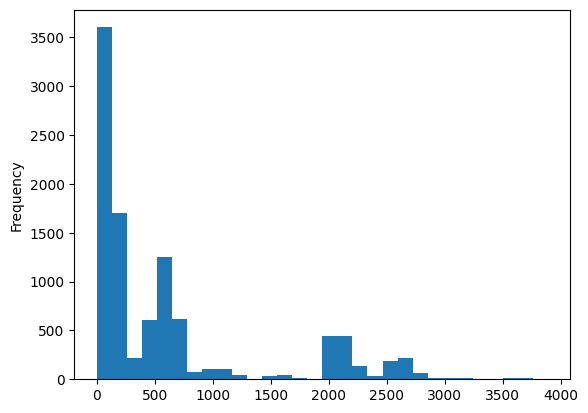

In [69]:
df['bint'].plot.hist(bins = 30)

In [70]:
df.bint.value_counts()

0       579
128     414
2       322
512     252
16      252
       ... 
3240      1
2234      1
1210      1
2448      1
39        1
Name: bint, Length: 900, dtype: int64

In [71]:
df.bint.unique().size

900

In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
reg = DecisionTreeRegressor(min_samples_split = 50) #optimize min_samples_split and other tuning parameters for the model later

In [88]:
X = pd.DataFrame(df.bint)

In [89]:
reg.fit(X, y)

DecisionTreeRegressor(min_samples_split=50)

In [90]:
cross_val_score(reg, X, y, cv=10)

array([0.43943911, 0.41440068, 0.48090877, 0.43458041, 0.44345156,
       0.4422494 , 0.41745621, 0.43959189, 0.46256257, 0.41601675])

In [91]:
df['pred'] = reg.predict(X)

In [139]:
group_map = dict(zip(np.sort(df.pred.unique()), range(df.pred.unique().shape[0])))
df['group'] = df.pred.apply(lambda x: group_map[x])

In [92]:
from sklearn.tree import plot_tree

In [93]:
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(1,1, figsize = (10,10))
# plot_tree(reg)
# plt.show()

In [94]:
# fig.savefig('image.svg')

In [95]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [96]:
linreg.fit(new_df, y)

LinearRegression()

In [97]:
linreg.score(new_df, y)

0.5165400464536543

In [98]:
newlinreg = LinearRegression()
cross_val_score(newlinreg, new_df, y, cv = 10)

array([0.49340374, 0.50754823, 0.54274944, 0.50542869, 0.50471415,
       0.5252082 , 0.50133055, 0.50407517, 0.5161858 , 0.51634498])

<AxesSubplot:ylabel='Frequency'>

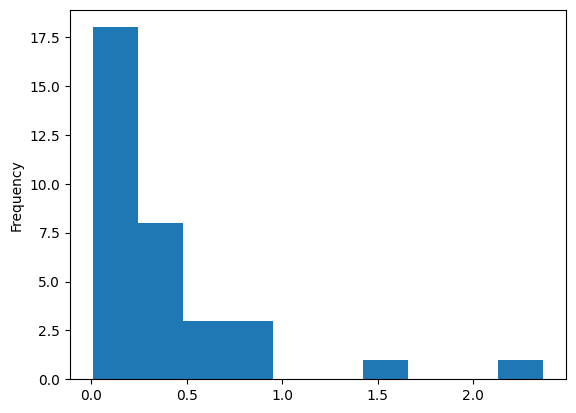

In [100]:
# absolute difference between beta estimates and actual beta
pd.Series(np.abs(linreg.coef_ - np.array(beta))).plot.hist()

In [101]:
df['counts'] = df.binary.apply(lambda x: sum([1 if y == "1" else 0 for y in list(x)]))
df[['counts','binary','bint','pred']].sort_values('pred')
# aggregate(lambda x: len(np.unique(x))).sort_index()

,counts,binary,bint,pred
9231,5,100010011010,2202,-12.802308
8914,5,100010011001,2201,-12.802308
2013,5,100010011010,2202,-12.802308
3976,5,100010011010,2202,-12.802308
1338,5,100010011010,2202,-12.802308
...,...,...,...,...
9356,7,100010111101,2237,18.026822
7956,6,001010111100,700,22.137416
4105,6,001010111100,700,22.137416
2584,6,001010111100,700,22.137416


In [102]:
unique = np.sort(df.pred.unique())

In [103]:
pred_dict = dict(zip(unique, range(len(unique))))

In [104]:
len(df.bint.unique())

900

In [105]:
# number of unique segments from the three model
len(unique)

248

In [107]:
# total number of variables (main + two-way + three-way in the actual model statement)
num_var

34

In [109]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 34)
cluster.fit(pd.DataFrame(df.pred))

AgglomerativeClustering(n_clusters=34)

In [110]:
cluster.labels_

array([ 5,  5,  3, ...,  9, 23, 13])

In [111]:
df['new_cluster'] = cluster.labels_

In [112]:
pred_dict = df.groupby('new_cluster').agg(np.mean).pred

In [113]:
new_group = dict(zip(pred_dict.sort_values(), range(len(pred_dict))))

In [114]:
df['new_pred'] = df.new_cluster.apply(lambda x: pred_dict[x])

In [115]:
df['final_cluster'] = df.new_pred.apply(lambda x: new_group[x])

In [116]:
from itertools import product
a = list(product([0,1],repeat=12)) #the list with all the 64 combinations


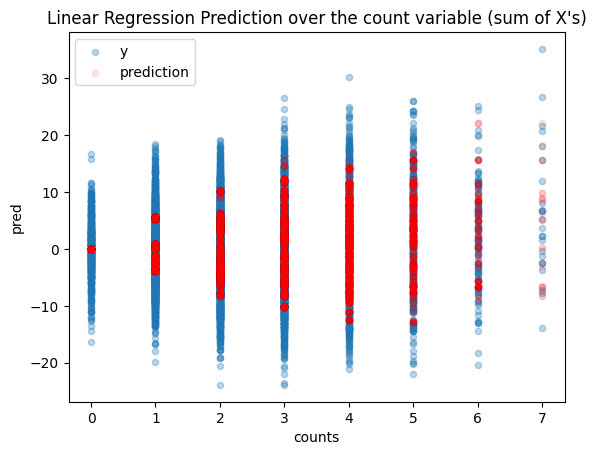

In [121]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
df.plot.scatter(x = 'counts',y = 'y', ax = ax, alpha = .3, label = 'y')
df.plot.scatter(x = 'counts',y = 'pred', ax = ax, color = 'red', label = 'prediction', alpha =  .1)
ax.set_title("Linear Regression Prediction over the count variable (sum of X's)")
plt.show()

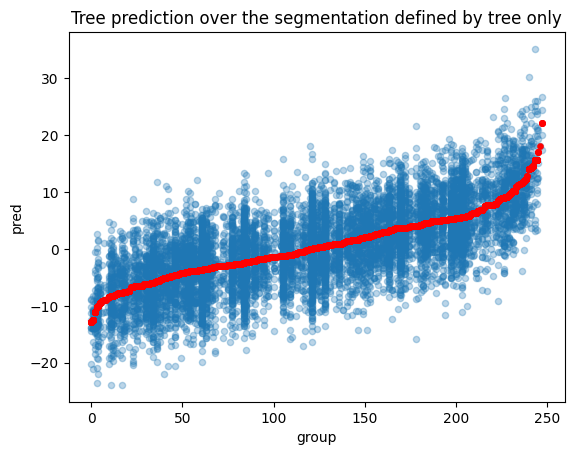

In [141]:
fig, ax = plt.subplots(1, 1)
df.plot.scatter(x = 'group',y = 'y', ax = ax, alpha = .3)
df.plot.scatter(x = 'group',y = 'pred', ax = ax, color = 'red', linewidth =.3)
ax.set_title("Tree prediction over the segmentation defined by tree only")
plt.show()

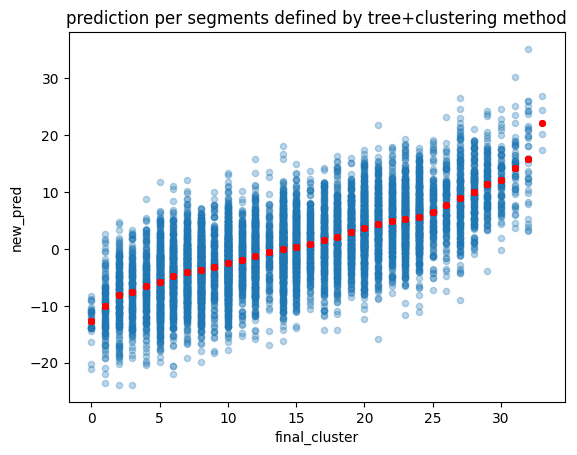

In [129]:
fig, ax = plt.subplots(1, 1)
df.plot.scatter(x = 'final_cluster',y = 'y', ax = ax, alpha = .3)
df.plot.scatter(x = 'final_cluster',y = 'new_pred', ax = ax, color = 'red', linewidth =.3)
ax.set_title("prediction per segments defined by tree+clustering method")
plt.show()

In [344]:
cluster_pred = df.groupby('new_cluster').agg(np.mean).pred

In [345]:
df['new_pred'] = df.new_cluster.apply(lambda x: cluster_pred[x])


In [346]:
df['lin_pred'] = linreg.predict(new_df)

In [347]:
df

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,y,binary,bint,pred,counts,new_cluster,group,new_pred,final_cluster,lin_pred
0,1,0,0,0,0,0,0,1,0,0,...,-1.579375,100000010010,2066,-2.165001,3,8,22,-2.130821,12,-1.296780
1,1,0,0,0,0,0,0,0,0,0,...,-3.907757,100000000000,2048,2.693371,1,12,64,2.696001,30,2.796411
2,1,0,0,0,0,0,0,0,0,0,...,-0.478372,100000000000,2048,2.693371,1,12,64,2.696001,30,2.796411
3,1,1,0,1,0,0,0,0,0,0,...,7.673626,110100000010,3330,3.063051,4,19,71,3.050349,32,6.834989
4,0,0,0,0,0,1,0,0,0,0,...,6.092760,000001000010,66,5.288516,2,10,93,5.297938,39,4.941000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,0,0,0,0,0,0,...,6.356656,100000000010,2050,6.941009,2,27,106,6.949412,45,6.824088
9996,1,0,0,0,0,0,0,0,0,0,...,3.536091,100000000000,2048,2.693371,1,12,64,2.696001,30,2.796411
9997,0,0,0,0,0,0,0,0,0,0,...,3.946988,000000000000,0,0.035274,0,30,40,0.036827,19,0.074515
9998,1,0,0,0,0,1,0,0,0,0,...,-4.490276,100001000000,2112,3.084073,2,19,72,3.050349,32,3.672401


In [348]:
result = df.groupby('binary').agg(np.mean).loc[:,['bint','counts','group','final_cluster','pred','new_pred','lin_pred']].reset_index()

In [350]:
result.sort_values(['counts','bint'])

,binary,bint,counts,group,final_cluster,pred,new_pred,lin_pred
0,000000000000,0.0,0.0,40.0,19.0,0.035274,0.036827,0.074515
1,000000000001,1.0,1.0,33.0,16.0,-0.858755,-0.852169,-1.291602
2,000000000010,2.0,1.0,79.0,35.0,4.050970,4.041470,4.102191
4,000000000100,4.0,1.0,73.0,33.0,3.343408,3.343408,2.867117
8,000000001000,8.0,1.0,75.0,34.0,3.785948,3.789198,3.593880
...,...,...,...,...,...,...,...,...
835,111000011101,3613.0,7.0,57.0,26.0,1.720850,1.720850,4.256219
845,111001010110,3670.0,7.0,57.0,26.0,1.720850,1.720850,3.542494
853,111100000111,3847.0,7.0,126.0,54.0,11.772713,11.791587,16.592694
858,111100100011,3875.0,7.0,126.0,54.0,11.772713,11.791587,15.123314


In [351]:
result

,binary,bint,counts,group,final_cluster,pred,new_pred,lin_pred
0,000000000000,0.0,0.0,40.0,19.0,0.035274,0.036827,0.074515
1,000000000001,1.0,1.0,33.0,16.0,-0.858755,-0.852169,-1.291602
2,000000000010,2.0,1.0,79.0,35.0,4.050970,4.041470,4.102191
3,000000000011,3.0,2.0,67.0,31.0,2.837393,2.828498,2.736074
4,000000000100,4.0,1.0,73.0,33.0,3.343408,3.343408,2.867117
...,...,...,...,...,...,...,...,...
856,111100010100,3860.0,6.0,126.0,54.0,11.772713,11.791587,5.989775
857,111100100000,3872.0,5.0,126.0,54.0,11.772713,11.791587,12.156217
858,111100100011,3875.0,7.0,126.0,54.0,11.772713,11.791587,15.123314
859,111101000000,3904.0,5.0,126.0,54.0,11.772713,11.791587,17.197038
